In [1]:
 # フォントを全て読み込み
import matplotlib.pyplot as plt
import japanize_matplotlib

import matplotlib
fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams['font.family'] = "MS Gothic"

In [2]:
import pandas_datareader.data as web
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.stattools import jarque_bera
end='2025/12/30'

In [3]:
tsd1=pd.read_csv("qqq.csv",index_col=0,parse_dates=True)['Adj Close'].dropna()
tsd2=pd.read_csv("ibb.csv",index_col=0,parse_dates=True)['Adj Close'].dropna()

In [4]:
def portfolio_rebalance(tsd1,tsd2):
    port=pd.concat([tsd1,tsd2],axis=1).dropna()
    port.columns=('p1','p2')#p1:tsd1の株価、p2:tsd2の株価
    port['a1']=0.0
    port['a2']=0.0
    port['v']=1.0
    n=len(port)
    p1=port['p1'].iloc[0]
    p2=port['p2'].iloc[0]
    v=port['v'].iloc[0]
    a1=a1_0=v/2/p1
    a2=a2_0=v/2/p2
    port.iloc[0,2]=a1
    port.iloc[0,3]=a2
    j=0
    for i in range(1,len(port)):
        p1=port['p1'].iloc[i]#今日のQQQの株価
        p2=port['p2'].iloc[i]#今日のIBBの株価
        p1_0=port['p1'].iloc[i-1]#前日のQQQの株価
        p2_0=port['p2'].iloc[i-1]#前日のIBBの株価
        a1_0=port['a1'].iloc[i-1]#前日のQQQの保有株数
        a2_0=port['a2'].iloc[i-1]#前日のIBBの保有枚数
        v_0=port['v'].iloc[i-1]#前日のリバランスポートフォリオの価値
        v=a1_0*p1+a2_0*p2#今日のリバランスポートフォリオの価値
        port.iloc[i,4]=v#リバランスポートフォリオの価値のアップデート
        if j==240*5:
            a1=v/2/p1#調整後のQQQの株数
            a2=v/2/p2#調整後のIBBの株数
            j=0
        j+=1
        port.iloc[i,2]=a1#QQQの株数のアップデート
        port.iloc[i,3]=a2#IBBの株数のアップデート
    port['v2']=0.5*port.p1+0.5*port.p2#リバランスの無いポートフォリオの価値
    return port
port=portfolio_rebalance(tsd1/tsd1.iloc[0],tsd2/tsd2.iloc[0])

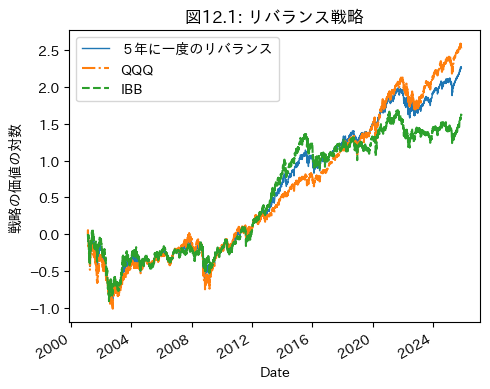

In [5]:
lnport=np.log(port)
lnport.v.plot(label="５年に一度のリバランス",linewidth=1.0,figsize=(5,4))
np.log(tsd1.iloc[-len(port):]/tsd1.iloc[-len(port)]).plot(label='QQQ',
                                                          style='-.')
np.log(tsd2.iloc[-len(port):]/tsd2.iloc[-len(port)]).plot(label='IBB',
                                                          linestyle='--')
plt.legend(loc="upper left")
plt.ylabel('戦略の価値の対数')
plt.title("図12.1: リバランス戦略")
plt.tight_layout()
#plt.savefig("図12.1.jpeg",dpi=600)
plt.show()

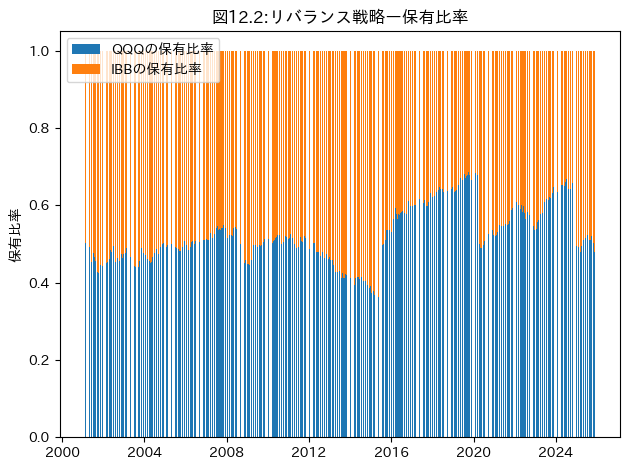

In [6]:
v=port.a1*port.p1+port.a2*port.p2
v1=port.a1*port.p1/v
v2=port.a2*port.p2/v
plt.bar(port.index,v1,label='QQQの保有比率')
plt.bar(port.index,v2,label='IBBの保有比率',bottom=v1)
plt.ylabel('保有比率')
plt.legend()
plt.title('図12.2:リバランス戦略ー保有比率')
plt.tight_layout()
#plt.savefig('図12.2.jpeg',dpi=600)
plt.show()